<a href="https://colab.research.google.com/github/Parth-nXp/TDNN_mini_projects/blob/main/sine_wave_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install torchinfo

In [37]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchinfo import summary
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


<function matplotlib.pyplot.show(close=None, block=None)>

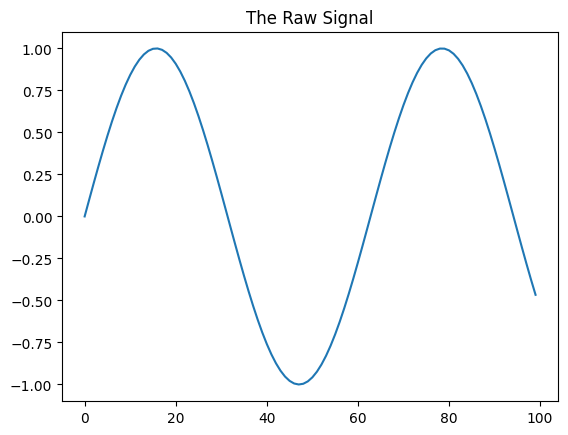

In [38]:
x = torch.linspace(0,100,1000)
data = torch.sin(x)

plt.plot(data[:100])
plt.title("The Raw Signal")
plt.show

In [39]:
def create_windows(data, window_size):
  X, y = [], []
  for i in range(len(data) - window_size):
    window = data[i : i + window_size]
    label = data[i+window_size]
    X.append(window)
    y.append(label)
  return torch.stack(X), torch.stack(y)


window_size = 10
X_raw , y_raw = create_windows(data, window_size)

print(X_raw.shape)
X_raw = X_raw.unsqueeze(-1)
y_raw = y_raw.unsqueeze(-1)
print(X_raw.shape)

torch.Size([990, 10])
torch.Size([990, 10, 1])


In [43]:
dataset = TensorDataset(X_raw, y_raw)
dataloader = DataLoader(dataset, batch_size = 32, shuffle =True)

In [44]:
class SineLSTM(nn.Module):
  def __init__(self):
    super(SineLSTM, self).__init__()

    self.lstm = nn.LSTM(input_size = 1, hidden_size = 50, num_layers = 1, batch_first = True)
    self.linear = nn.Linear(50, 1)

  def forward(self, x):
    output, _ = self.lstm(x)
    last_step = output[:, -1, :]
    out = self.linear(last_step)
    return out

model = SineLSTM().to(device)

In [45]:
summary(model, input_size=(32, 10, 1))

Layer (type:depth-idx)                   Output Shape              Param #
SineLSTM                                 [32, 1]                   --
├─LSTM: 1-1                              [32, 10, 50]              10,600
├─Linear: 1-2                            [32, 1]                   51
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 3.39
Input size (MB): 0.00
Forward/backward pass size (MB): 0.13
Params size (MB): 0.04
Estimated Total Size (MB): 0.17

In [46]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr = 0.001)

In [47]:
total_loss_plot = []
epochs = 200

for epoch in range(epochs):
  total_loss = 0
  for batch_x, batch_y in dataloader:
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    prediction = model(batch_x)
    batch_loss = criterion(prediction, batch_y)

    total_loss += batch_loss.item()
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  total_loss_plot.append(round(total_loss / 1000, 4))
  print(f"Epoch: {epoch + 1}, Loss: {total_loss_plot[-1]}")
  print("="*25)


Epoch: 1, Loss: 0.0117
Epoch: 2, Loss: 0.004
Epoch: 3, Loss: 0.002
Epoch: 4, Loss: 0.0004
Epoch: 5, Loss: 0.0001
Epoch: 6, Loss: 0.0
Epoch: 7, Loss: 0.0
Epoch: 8, Loss: 0.0
Epoch: 9, Loss: 0.0
Epoch: 10, Loss: 0.0
Epoch: 11, Loss: 0.0
Epoch: 12, Loss: 0.0
Epoch: 13, Loss: 0.0
Epoch: 14, Loss: 0.0
Epoch: 15, Loss: 0.0
Epoch: 16, Loss: 0.0
Epoch: 17, Loss: 0.0
Epoch: 18, Loss: 0.0
Epoch: 19, Loss: 0.0
Epoch: 20, Loss: 0.0
Epoch: 21, Loss: 0.0
Epoch: 22, Loss: 0.0
Epoch: 23, Loss: 0.0
Epoch: 24, Loss: 0.0
Epoch: 25, Loss: 0.0
Epoch: 26, Loss: 0.0
Epoch: 27, Loss: 0.0
Epoch: 28, Loss: 0.0
Epoch: 29, Loss: 0.0
Epoch: 30, Loss: 0.0
Epoch: 31, Loss: 0.0
Epoch: 32, Loss: 0.0
Epoch: 33, Loss: 0.0
Epoch: 34, Loss: 0.0
Epoch: 35, Loss: 0.0
Epoch: 36, Loss: 0.0
Epoch: 37, Loss: 0.0
Epoch: 38, Loss: 0.0
Epoch: 39, Loss: 0.0
Epoch: 40, Loss: 0.0
Epoch: 41, Loss: 0.0
Epoch: 42, Loss: 0.0
Epoch: 43, Loss: 0.0
Epoch: 44, Loss: 0.0
Epoch: 45, Loss: 0.0
Epoch: 46, Loss: 0.0
Epoch: 47, Loss: 0.0
Epoch: 48

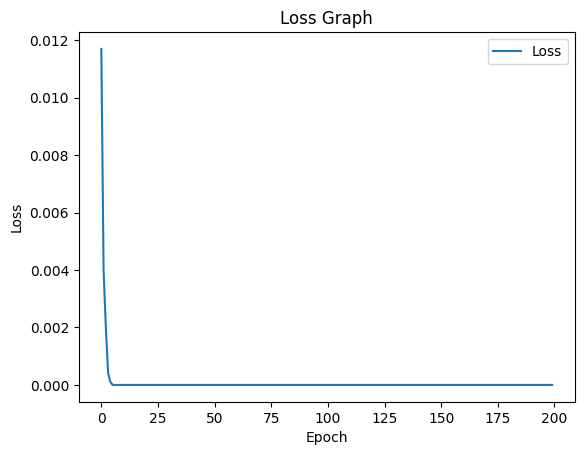

In [51]:
plt.plot(total_loss_plot, label ="Loss")
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

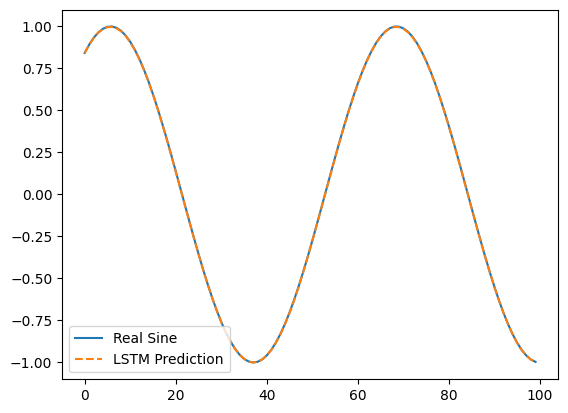

In [52]:
model.eval()

with torch.no_grad():
  test_pred = model(X_raw.to(device)).cpu()
  plt.plot(y_raw[:100], label = "Real Sine")
  plt.plot(test_pred[:100], label = "LSTM Prediction", linestyle = "--")
  plt.legend()
  plt.show()